In [1]:
#Step 0. Load libreries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

###Diccionario de variables
- **Pregnancies.** Número de embarazos del paciente (numérico)  
- **Glucose.** Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)  
- **BloodPressure.** Presión arterial diastólica (medida en mm Hg) (numérico)  
- **SkinThickness.** Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)  
- **Insulin.** Insulina sérica de 2 horas (medida en mu U/ml) (numérico)  
- **BMI.** Índice de masa corporal (numérico)  
- **DiabetesPedigreeFunction.** Función de pedigrí de diabetes (numérico)  
- **Age.** Edad del paciente (numérico)  
- **Outcome.** Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)  

In [2]:
#Step 1. Load Data
url = 'https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv'
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df_raw.sample(10, random_state=2025)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
82,7,83,78,26,71,29.3,0.767,36,0
152,9,156,86,28,155,34.3,1.189,42,1
393,4,116,72,12,87,22.1,0.463,37,0
691,13,158,114,0,0,42.3,0.257,44,1
14,5,166,72,19,175,25.8,0.587,51,1
542,10,90,85,32,0,34.9,0.825,56,1
749,6,162,62,0,0,24.3,0.178,50,1
629,4,94,65,22,0,24.7,0.148,21,0
724,1,111,94,0,0,32.8,0.265,45,0
222,7,119,0,0,0,25.2,0.209,37,0


In [4]:
#Step 2. Preprocessing
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()

df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.sample(10, random_state=2025)

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
82,7,83,78,26,71,29.3,0.767,36,0
152,9,156,86,28,155,34.3,1.189,42,1
393,4,116,72,12,87,22.1,0.463,37,0
691,13,158,114,0,0,42.3,0.257,44,1
14,5,166,72,19,175,25.8,0.587,51,1
542,10,90,85,32,0,34.9,0.825,56,1
749,6,162,62,0,0,24.3,0.178,50,1
629,4,94,65,22,0,24.7,0.148,21,0
724,1,111,94,0,0,32.8,0.265,45,0
222,7,119,0,0,0,25.2,0.209,37,0


In [6]:
#Step 3. EDA
df_train, df_test = train_test_split(df, test_size=0.1, random_state=2025, stratify=df['outcome'])

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.shape, df_test.shape

((691, 9), (77, 9))

In [7]:
display(df_train.describe().T)

,count,mean,std,min,25%,50%,75%,max
pregnancies,691.0,3.846599,3.384050,0.000,1.0000,3.000,6.0000,17.00
glucose,691.0,120.700434,31.835651,0.000,99.0000,117.000,140.0000,199.00
bloodpressure,691.0,69.406657,18.577715,0.000,63.0000,72.000,80.0000,122.00
skinthickness,691.0,20.609262,16.075479,0.000,0.0000,23.000,32.0000,99.00
insulin,691.0,79.094067,115.859190,0.000,0.0000,18.000,126.0000,846.00
bmi,691.0,32.049493,7.745550,0.000,27.3000,32.000,36.6000,67.10
diabetespedigreefunction,691.0,0.467904,0.322700,0.078,0.2405,0.375,0.6215,2.42
age,691.0,33.166425,11.656923,21.000,24.0000,29.000,40.0000,81.00
outcome,691.0,0.348770,0.476926,0.000,0.0000,0.000,1.0000,1.00


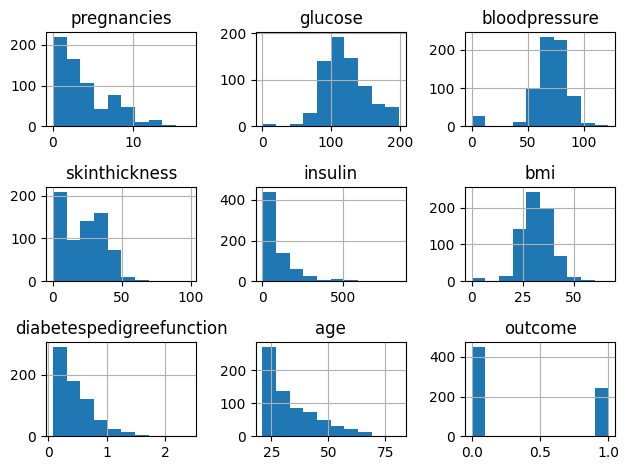

In [8]:
df_train.hist()
plt.tight_layout()
plt.show()

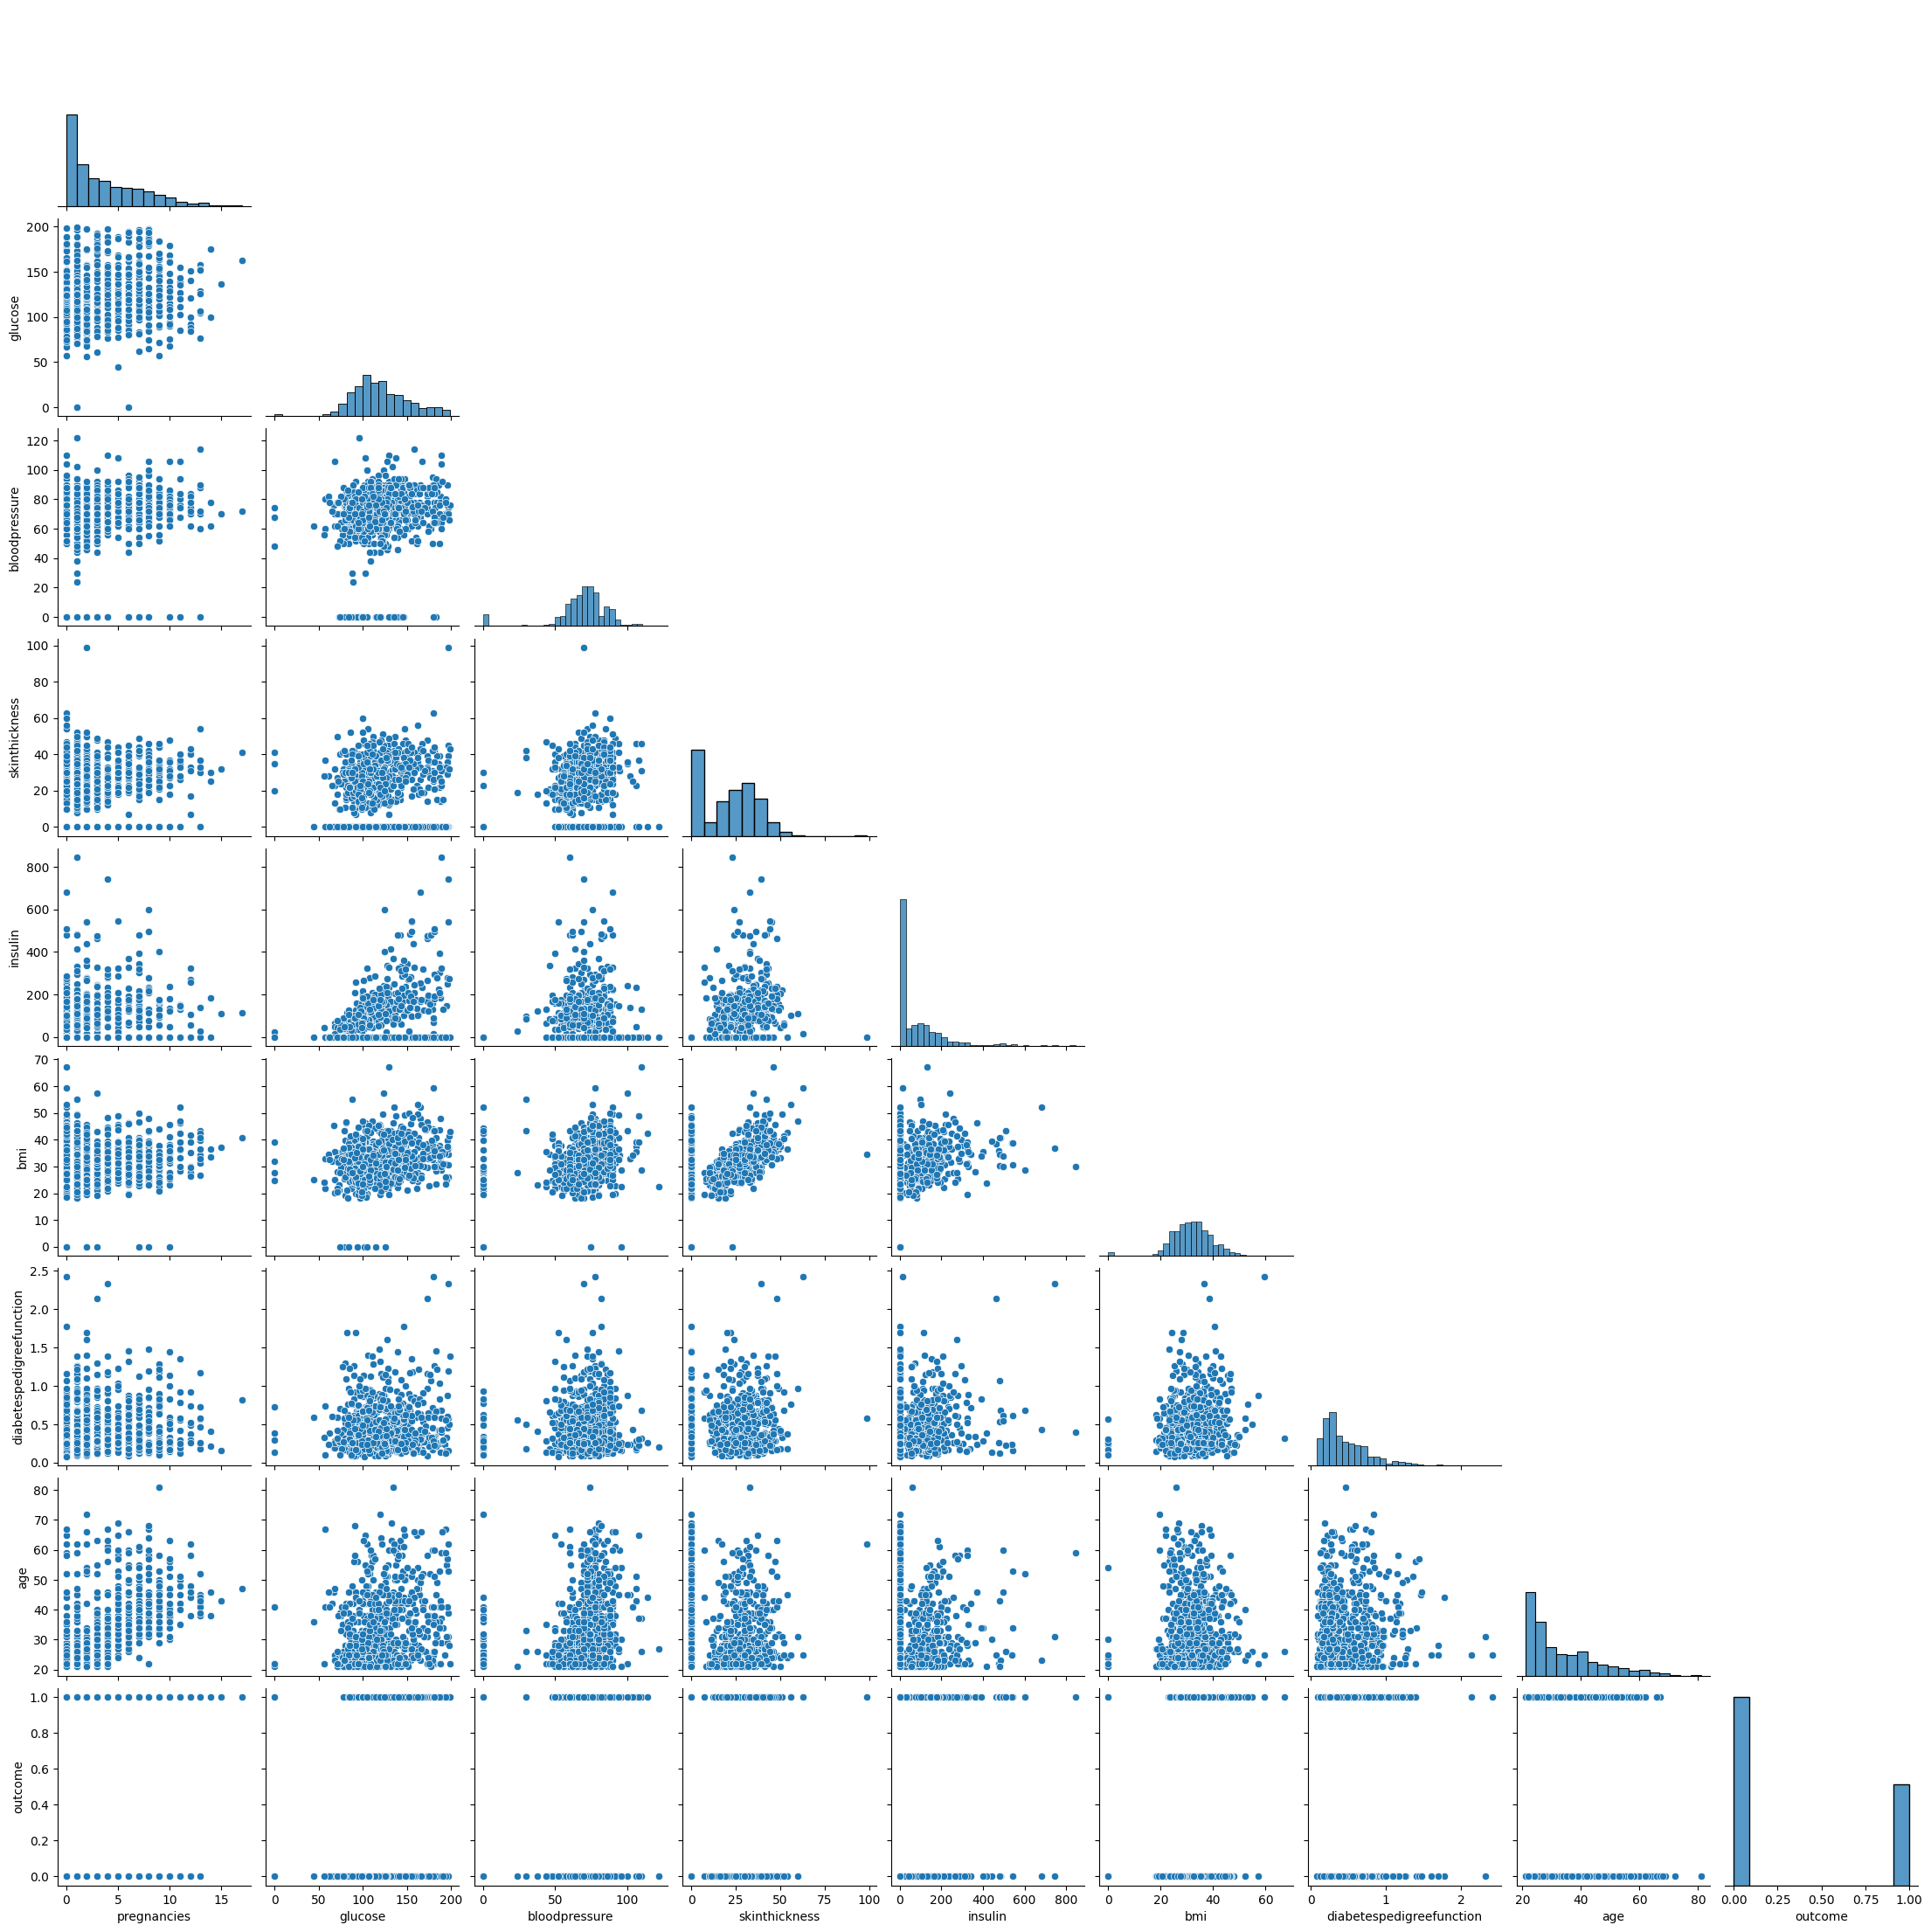

In [9]:
sns.pairplot(df_train, corner=True)
plt.show()

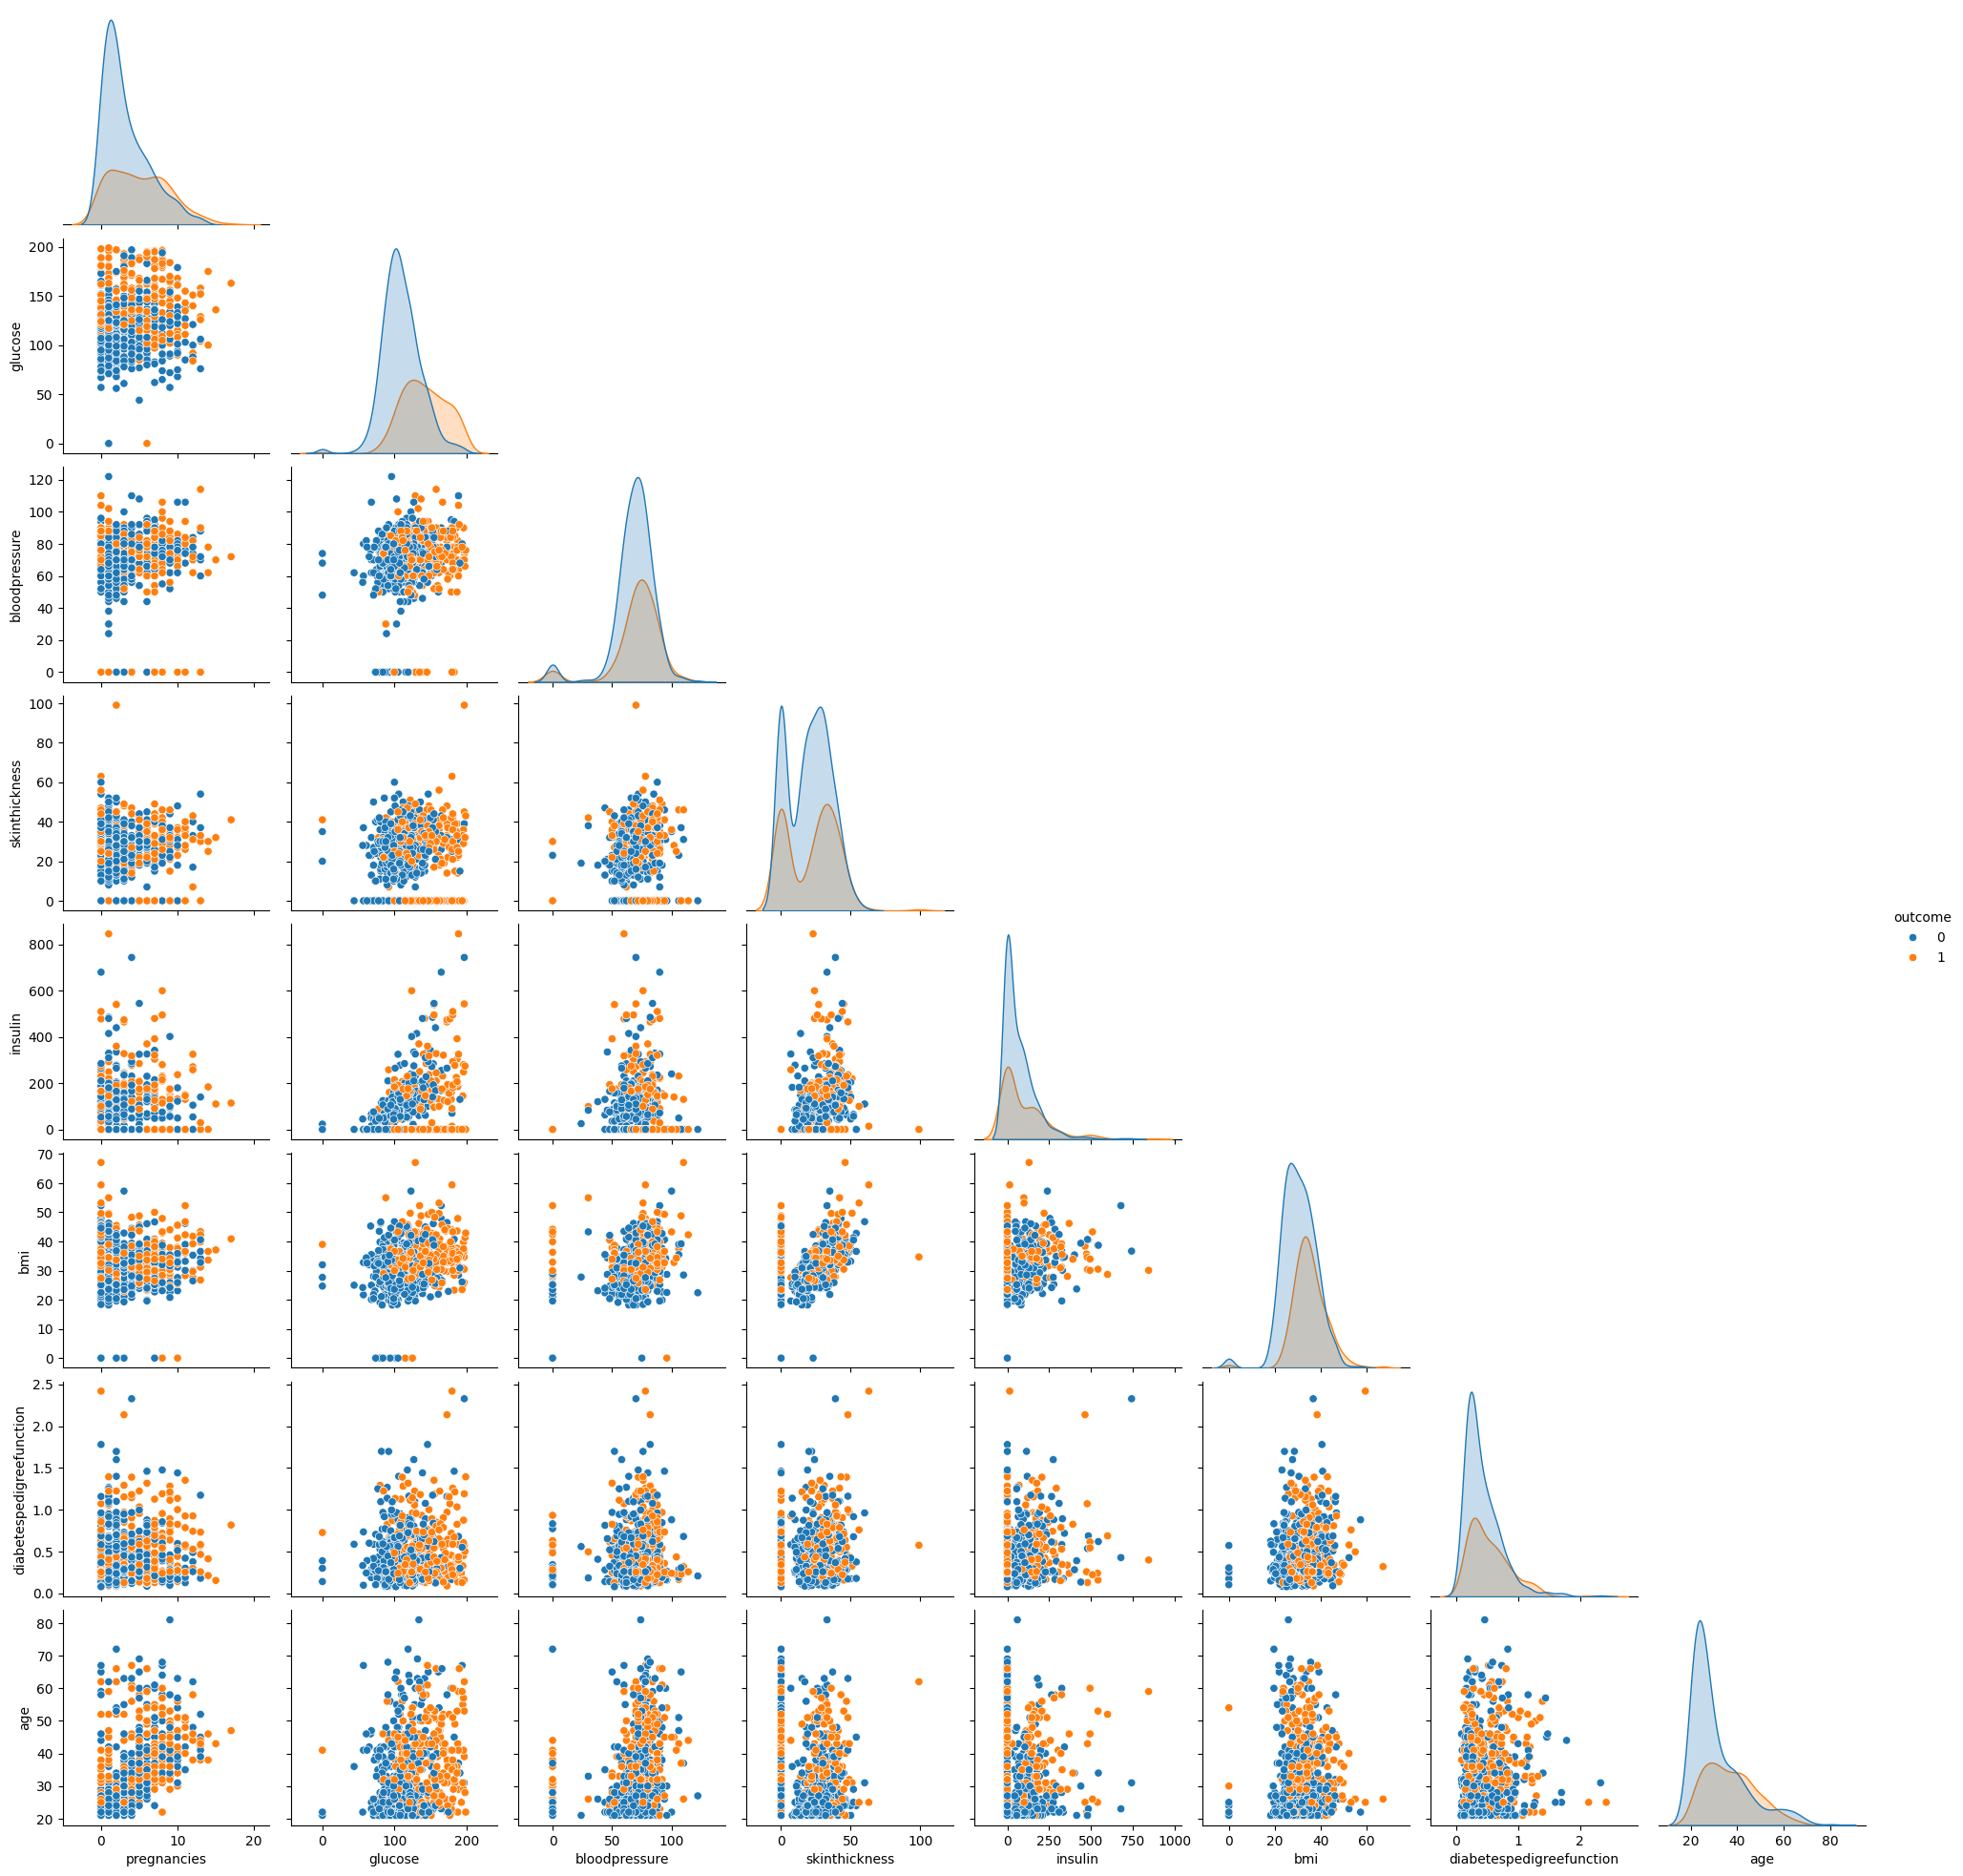

In [10]:
sns.pairplot(df_train, corner=True, hue='outcome')
plt.show()

podemos observar que la variable "Glucosa" logra separar un poco las distribuciones de las variables dependientes, para este caso la variable es "Outcome" que se divide en 2: 0(No diabetes) / 1(Diabetes)

`Cuando el nivel de glucosa en sangre es alto (por ejemplo, > 100–150) y el número de embarazos es menor a 10, esto puede ser un indicador de diabetes. A pesar de que no exista una correlación entre si.`

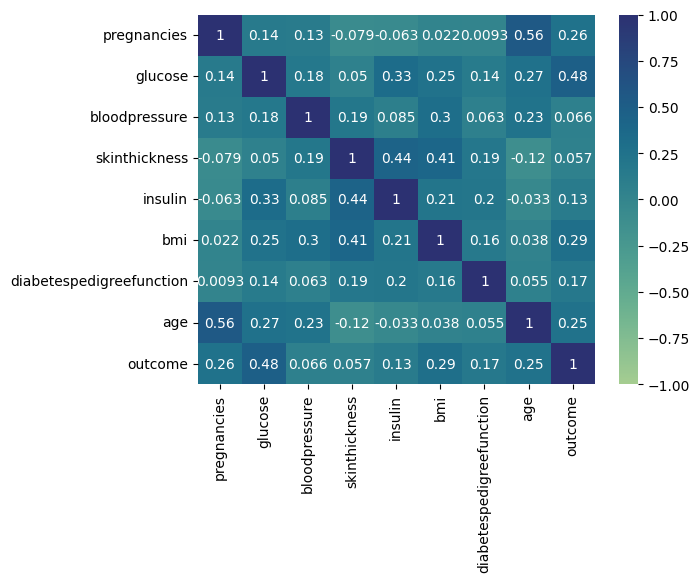

In [11]:
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap='crest')
plt.show()

In [12]:
#Step 4. Machine Learning
X_train = df_train.drop(columns = 'outcome')
y_train = df_train['outcome']
X_test = df_test.drop(columns = 'outcome')
y_test = df_test['outcome']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((691, 8), (691,), (77, 8), (77,))

In [13]:
tree_clf = DecisionTreeClassifier(random_state=2025)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2025)

In [14]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 2025,
 'splitter': 'best'}

In [15]:
y_hat = tree_clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_hat)*100:.2f}%')

Accuracy: 70.13%


Con este resultado podemos mostrar que nuestro modelo de arbol de decision clasifica correctamente el 70.13% de los datos. A pesar de que no hemos asignado un "max_depth" para nuestro arbol.

In [16]:
print(f"Profundidad: {tree_clf.get_depth()}")

Profundidad: 13


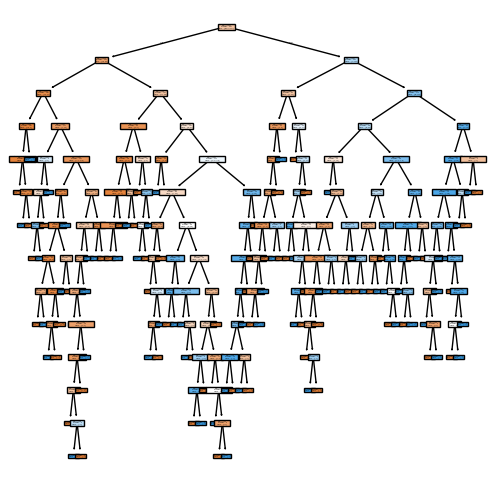

In [17]:
plt.figure(figsize=(6,6))
plot_tree(tree_clf, feature_names=X_train.columns, filled=True, impurity=True)
plt.show()

Dejando que el modelo trabaje solo, podemos ver como hay Overfitting debido a que existe una profundidad muy grande.

- `Overfitting:` Es cuando un modelo de aprendizaje automático está sobreajustado cuando "memoriza" los datos de entrenamiento en lugar de aprender los patrones subyacentes.

In [18]:
tree_clf_cv = GridSearchCV(
    tree_clf,
    param_grid={
        'max_depth':[1,2,3,4,5,6,7],
        'min_samples_leaf':[2,4,6]
    },
    cv = 5,
)
#Con este algoritmo buscamos los mejores parametros de tree decision
tree_clf_cv.fit(X_train, y_train)
tree_clf_cv.best_params_

{'max_depth': 5, 'min_samples_leaf': 6}

In [19]:
y_pred = tree_clf_cv.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')

Accuracy: 74.03%


Al generalizar de una mejor forma nos damos cuenta que la precisión con respecto al anterior ha mejorado un ± 3%

In [20]:
best_estimator = tree_clf_cv.best_estimator_
best_estimator

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, random_state=2025)

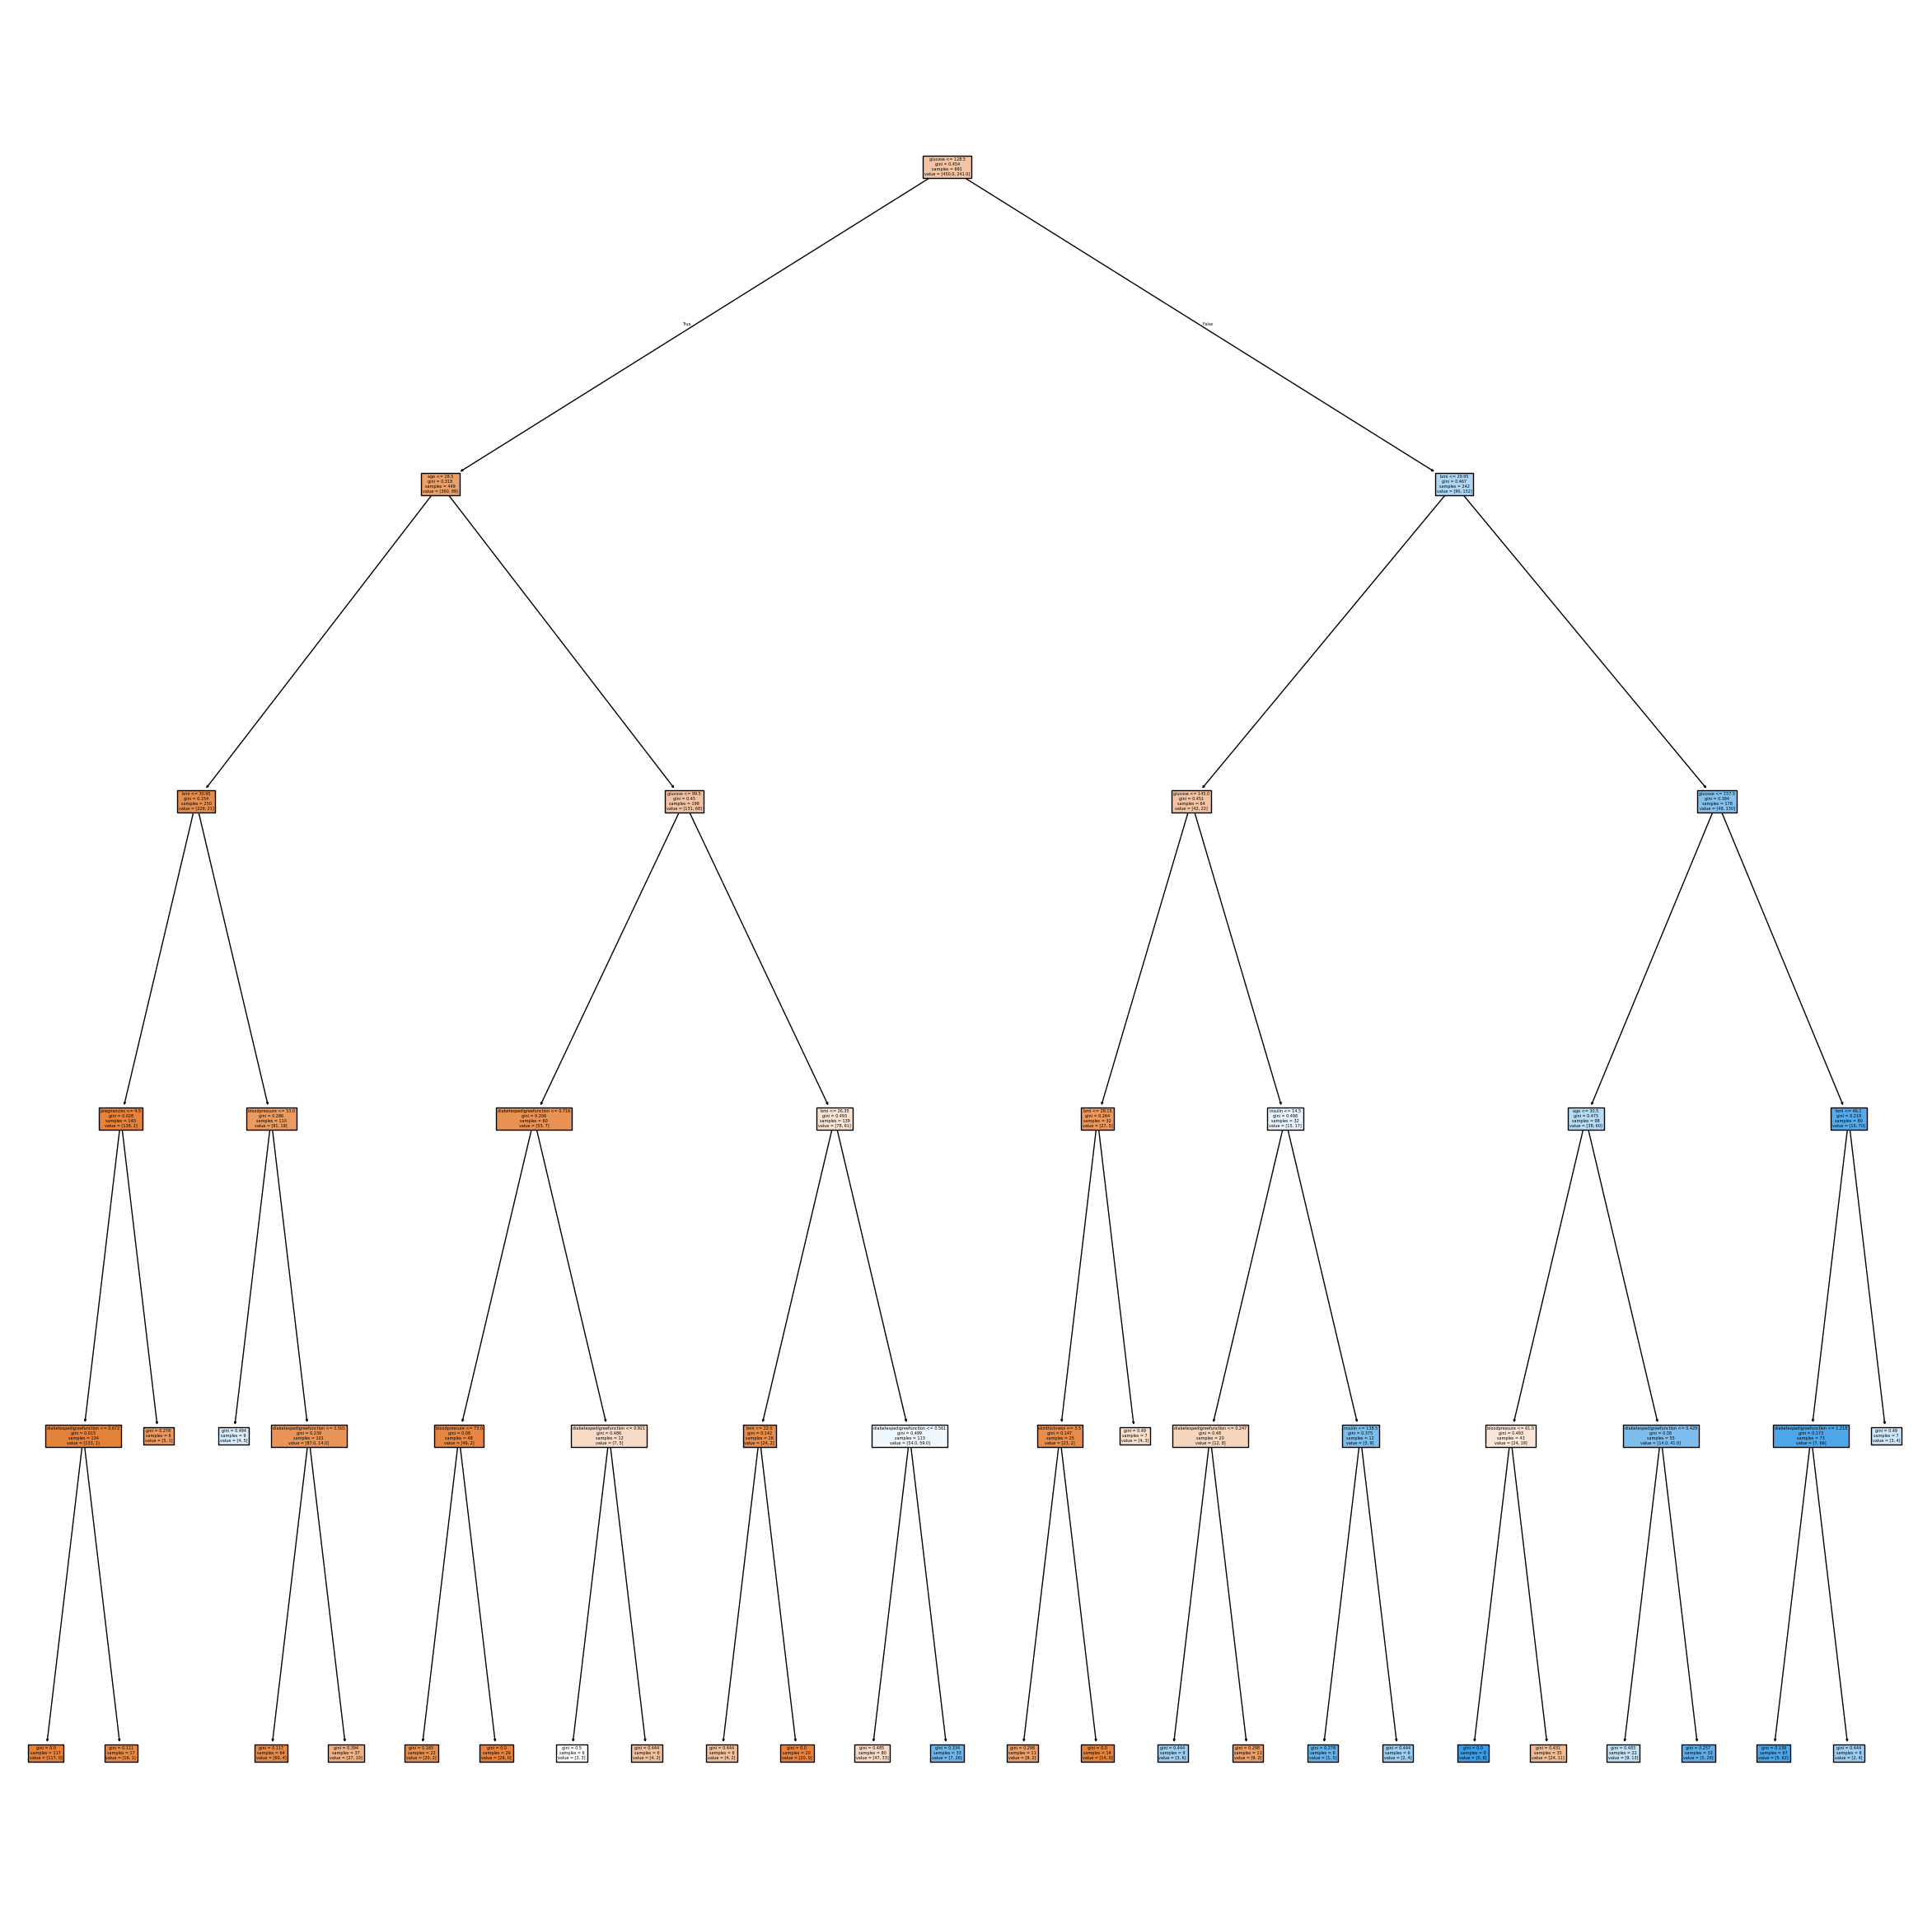

In [21]:
plt.figure(figsize=(30,30))
plot_tree(best_estimator, feature_names=X_train.columns, filled=True, impurity=True)
plt.show()

In [22]:
#Model Ensembling (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay

In [23]:
negativo = df_train[df_train['outcome'] == 0]['outcome'].count()
positivo = df_train[df_train['outcome'] == 1]['outcome'].count()
print(f"Casos negativos: {negativo}")
print(f"Casos positivos: {positivo}")

Casos negativos: 450
Casos positivos: 241


In [24]:
r_forest_clf = RandomForestClassifier(class_weight='balanced', random_state=2025) #Indicamos que queremos un balance de clases

r_forest_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=2025)

In [25]:
y_hat_rf = r_forest_clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_hat_rf)*100:.2f}%')

Accuracy: 72.73%


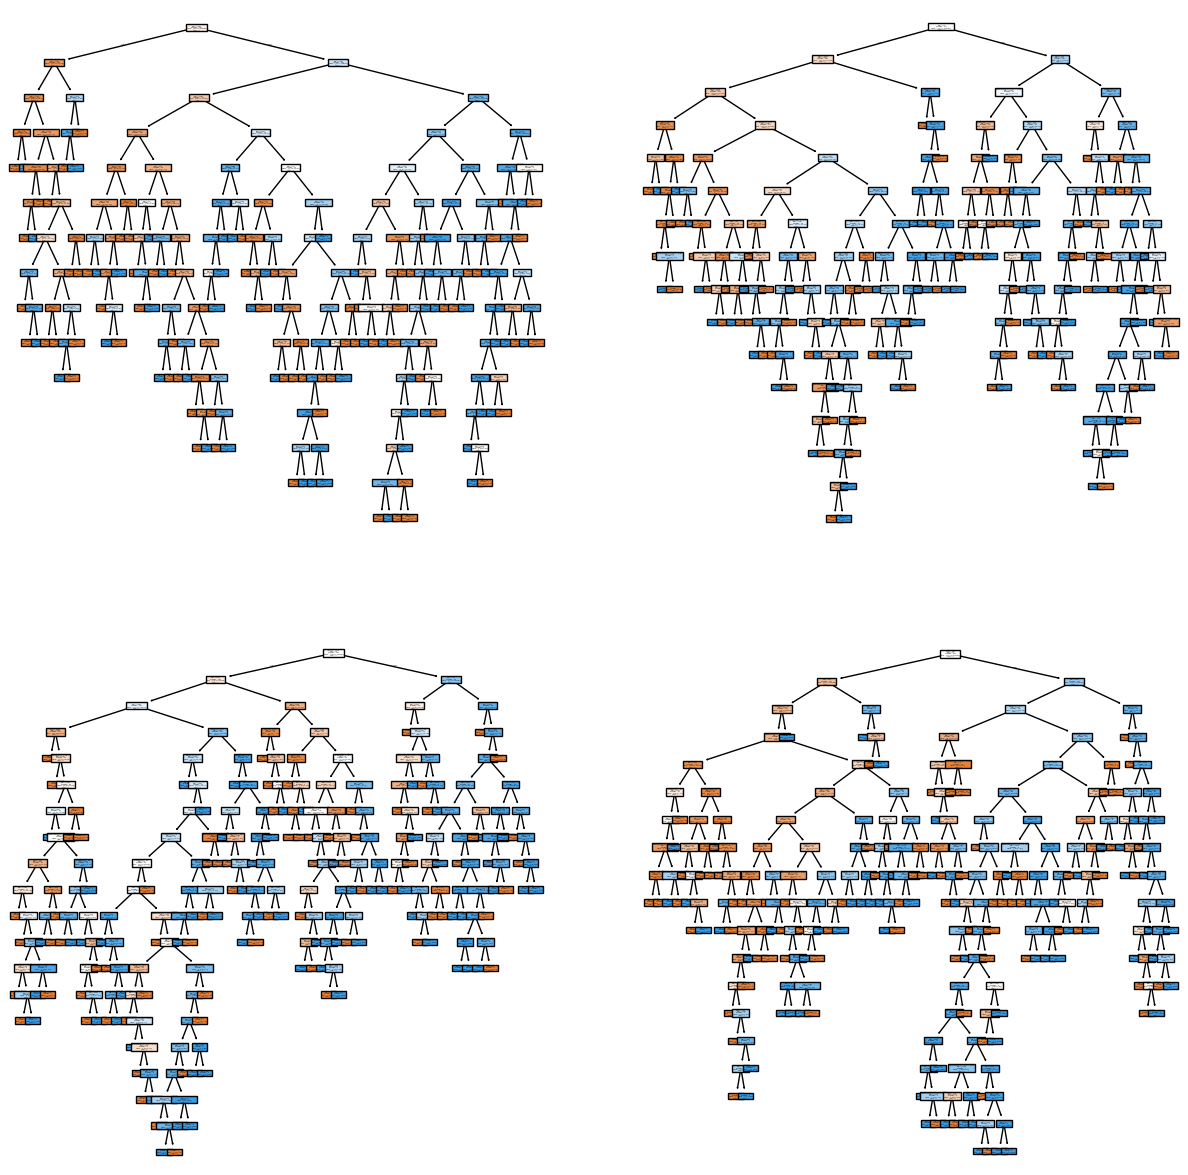

In [26]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
plot_tree(r_forest_clf.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
plot_tree(r_forest_clf.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
plot_tree(r_forest_clf.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
plot_tree(r_forest_clf.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [27]:
r_forest_clf_cv = GridSearchCV( #Numero de combinaciones de busqueda = 7x3x3, es decir la cantidad de elementos que tiene nuestro paramgrid
    r_forest_clf,
    param_grid={
        'max_depth':[1,2,3,4,5,6,7], #7
        'n_estimators':[50,100,150], #3
        'min_samples_split':[2,4,6] #3
    },
    cv = 5
)
#Con este algoritmo buscamos los mejores parametros de tree decision
r_forest_clf_cv.fit(X_train, y_train)
r_forest_clf_cv.best_params_

{'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 50}

In [28]:
best_estimator_rf = r_forest_clf_cv.best_estimator_
best_estimator

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, random_state=2025)

In [29]:
y_pred_rf_best = best_estimator_rf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf_best)*100:.2f}%')

Accuracy: 74.03%


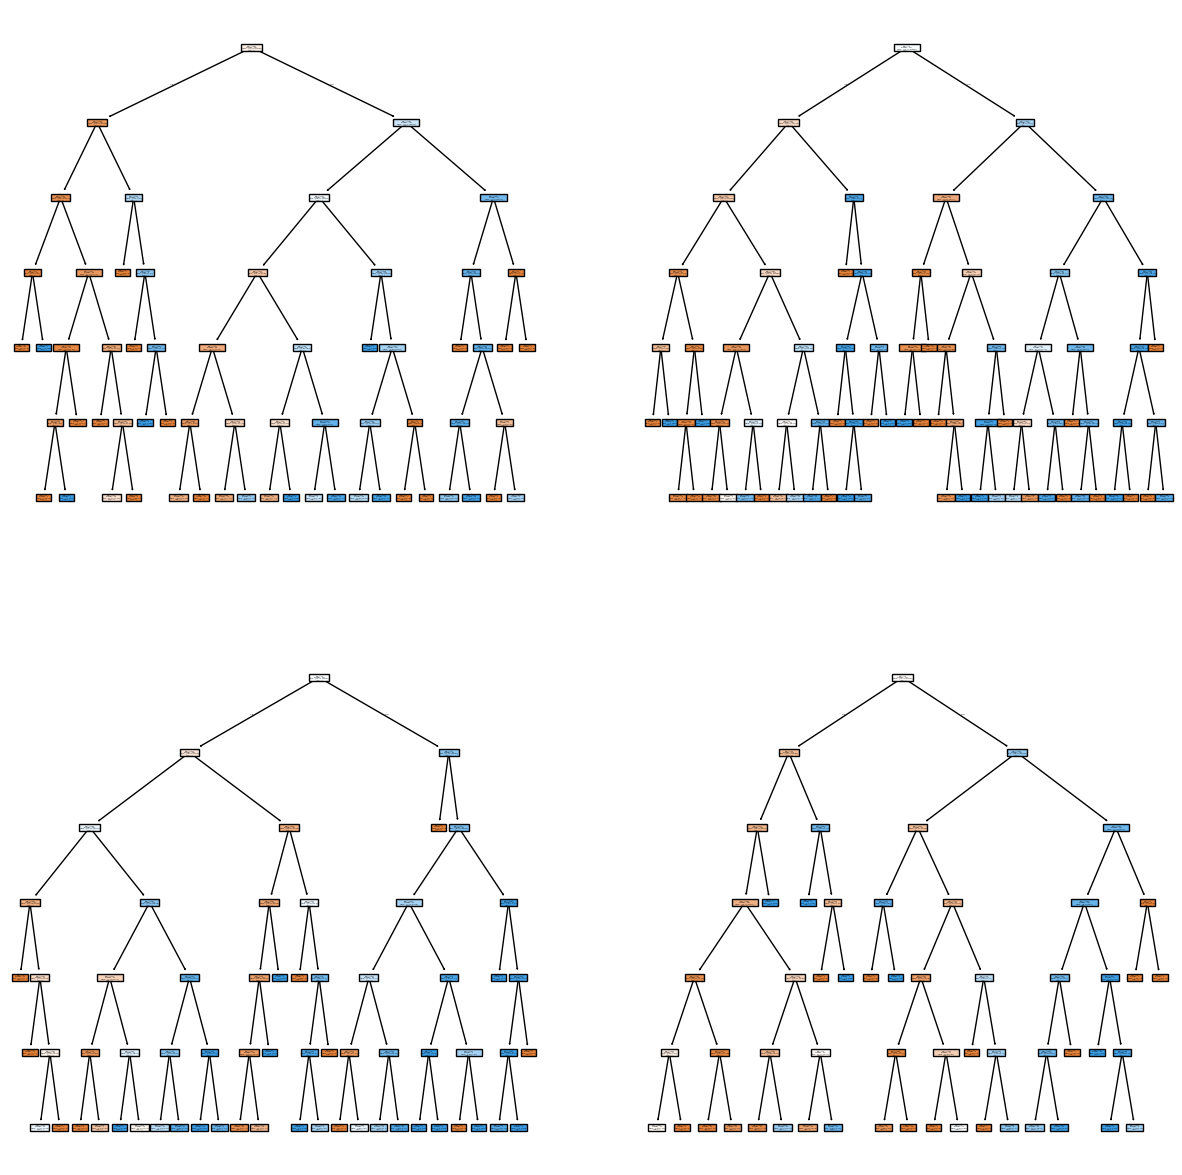

In [30]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
plot_tree(best_estimator_rf.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
plot_tree(best_estimator_rf.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
plot_tree(best_estimator_rf.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
plot_tree(best_estimator_rf.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

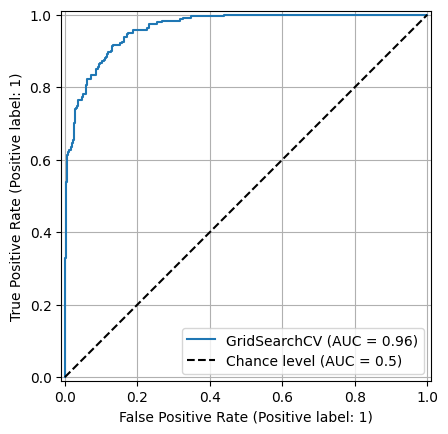

In [31]:
RocCurveDisplay.from_estimator(
    r_forest_clf_cv, X_train, y_train, plot_chance_level=True
)
plt.grid(True)
plt.show()

In [58]:
#Model Ensembling (Boosting)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import permutation_importance

In [33]:
clf_boosting = GradientBoostingClassifier(random_state=2025)
clf_boosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=2025)

In [38]:
y_hat_gb = clf_boosting.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_hat_gb)*100:.2f}%')

Accuracy: 71.43%


In [41]:
clf_boosting_cv = GridSearchCV(
    estimator = clf_boosting,
    param_grid = {
        'max_depth':[2,3,4,5,6,7],
        'min_samples_split':[2,4,6],
        'n_estimators':[50,100,150,200],
        'learning_rate':[0.1,1,10,100]
    },
    cv = 5
)
clf_boosting_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=2025),
             param_grid={'learning_rate': [0.1, 1, 10, 100],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 150, 200]})

In [44]:
clf_boosting_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_split': 6,
 'n_estimators': 50}

In [55]:
clf_bs_best = GradientBoostingClassifier(max_depth=2, min_samples_split=6,
                                         n_estimators=50, learning_rate=0.1,
                                         random_state=2025)
clf_bs_best.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=2, min_samples_split=6, n_estimators=50,
                           random_state=2025)

In [56]:
y_hat_gb_best = clf_bs_best.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_hat_gb_best)*100:.2f}%')

Accuracy: 71.43%


Podemos decir que con nuestra mejora del modelo de Arboles de Decisiones, obtuvimos un 0.40% más de $Accuracy$ con respecto a nuestro modelo de Random Forest

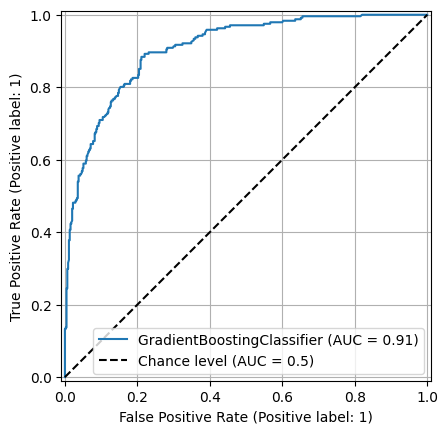

In [57]:
RocCurveDisplay.from_estimator(
    clf_bs_best, X_train, y_train, plot_chance_level=True
)
plt.grid(True)
plt.show()

Para este ejercicio de clasificación podemos determinar que en base a nuestra CURVA ROC, el modelo de Random_Forest hace mejores predicciones debido a que su $AUC = 0.96$. A pesar de que el modelo de Boosting no tiene malos porcentajes ni puntuacion AUC, el modelo Random_Forest funciona mejor para la clasificación de pacientes con diabetes o no.

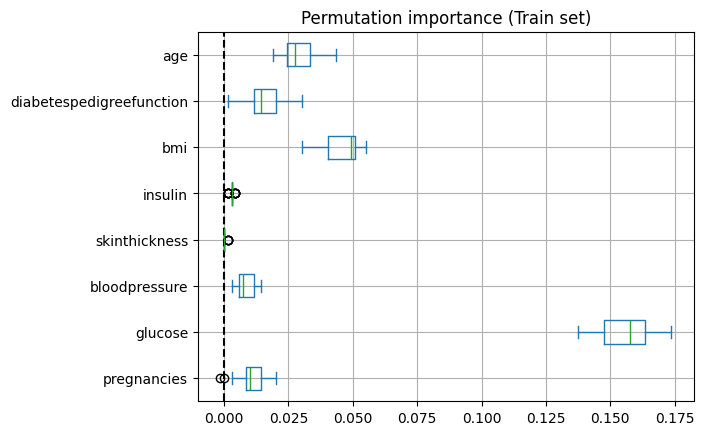

In [59]:
importance = permutation_importance(clf_bs_best, X_train, y_train, n_repeats=25, random_state=2025)
importance_df = pd.DataFrame(importance.importances.T, columns=X_train.columns)

ax = importance_df.plot.box(vert=False)
ax.axvline(x=0, color='k', linestyle='--')
ax.set_title("Permutation importance (Train set)")
ax.grid(True)
plt.show()

Mi modelo de Boosting está utilizando las variables "Glucose", "BMI" y "AGE" para hacer las predicciones.